In [33]:
#Importing our Libraries
import pandas as pd 
import numpy as np


## Functions to Loading the  datasets

In [103]:
#Function to load the datasets
def Data_frames(type,data):
    if type=='csv':
        My_data=pd.read_csv(data)
        return My_data
    else:
        My_data=pd.read_excel(data,header=1)
        return My_data     

In [ ]:
#The Mortality rate dataset
Data_frames('csv','Death due to respiratory conditions (new).csv')

In [ ]:
#Loading the PM concentration dataset
Data_frames('csv','Particulate Matter Concentration world wide...csv')

In [ ]:
#Loading the WHO Air Quality database
Data_frames('csv','WHO_AirQuality_Database_2016_Africa.csv')

In [ ]:
# CO2 emission dataset
Data_frames('csv',"CO2 Emission in KT. in excel.csv")

In [ ]:
# NO emission dataset
Data_frames('xlsx','Nitogen Oxide Emissions edited.xlsx')

## Function to check the attributes of our datasets.

In [94]:
# This function  checks the nesessaer attributes of the dataset
def attributes(type,data):
    if type=='csv':
        My_df=pd.read_csv(data)
        print(My_df.shape)
        print('\n')
        print(My_df.isnull().sum())
        print('\n')
        print(My_df.duplicated().any())
        print('\n')
        print(My_df.info)
    else:
        My_df=pd.read_excel(data,header=1)
        print(My_df.shape)
        print('\n')
        print(My_df.isnull().sum())
        print('\n')
        print(My_df.duplicated().any())
        print('\n')
        print(My_df.info)



In [ ]:
#Mortality rate attributes
attributes('csv','Death due to respiratory conditions (new).csv')

In [ ]:
#Particulate Matter concentration attributes
attributes('csv','Particulate Matter Concentration world wide...csv')

In [ ]:
#WHO Air Quality database attributes
attributes('csv','WHO_AirQuality_Database_2016_Africa.csv')

In [ ]:
#CO2 Concentration attributes
attributes('csv',"CO2 Emission in KT. in excel.csv")

In [ ]:
# NO concentration attributes
attributes('xlsx','Nitogen Oxide Emissions edited.xlsx')

## Cleaning the mortality rate dataset

In [114]:
M_data=Data_frames('csv','Death due to respiratory conditions (new).csv')
# Getting rid of columns with null values
M_data.dropna(axis=1,how='all',inplace=True)
M_data
# Dropping unnessesary columns
D_Mortality_data= M_data.drop(M_data.columns[[0,2,3,5,6,8,10,11,13,14,16,20,21,22]], axis = 1)
D_Mortality_data
# Renaming columns 
Africa_df=D_Mortality_data.rename(columns={'ParentLocation':'Continent','Location':'Country','Period':'Year','Dim1':'Gender','Dim2':'Cause'})
Africa_df
# Filtering out the African countries.
New_df=Africa_df[Africa_df['Continent']=='Africa']
New_df
# Constructing a new column with average
New_df['Average_death_Value']=New_df[['FactValueNumeric','FactValueNumericLow','FactValueNumericHigh']].mean(axis=1)
#Dropping the Fact value Numeric columns
D_New_df=New_df.drop(New_df.columns[[6,7,8]],axis=1)
D_New_df
# Dropping duplicates
D_New_df.drop_duplicates
D_New_df.head()

<ipython-input-114-5eab3809d757>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['Average_death_Value']=New_df[['FactValueNumeric','FactValueNumericLow','FactValueNumericHigh']].mean(axis=1)


,Indicator,Continent,Country,Year,Gender,Cause,Average_death_Value
0,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041000
1,Ambient air pollution attributable death rate ...,Africa,Niger,2016,Female,"Trachea, bronchus, lung cancers",0.047000
2,Ambient air pollution attributable death rate ...,Africa,United Republic of Tanzania,2016,Female,"Trachea, bronchus, lung cancers",0.052000
3,Ambient air pollution attributable death rate ...,Africa,United Republic of Tanzania,2016,Both sexes,"Trachea, bronchus, lung cancers",0.056333
4,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Both sexes,"Trachea, bronchus, lung cancers",0.057333


In [119]:
#Creating a function to confirming the cleaning operation
def new_attributes(data):
    print(data.shape)
    print('\n')
    print(data.isnull().sum())
    print('\n')
    print(data.duplicated().any())
    print('\n')
    print(data.info)

In [ ]:
#Calling the function on Mortality dataset
new_attributes(D_New_df)

## Cleaning the Particulate Matter Concentration dataset

In [129]:
#Assigning the dataframe a variable
PM_data=Data_frames('csv','Particulate Matter Concentration world wide...csv')
#Getting rid of null values
PM_data.dropna(axis=1,how='all',inplace=True)
PM_data.head()
# Dropping unnecessary columns
DPM_dataset= PM_data.drop(PM_data.columns[[0,2,3,5,6,8,10,11,13,17,18,19]], axis = 1)
DPM_dataset
# Renaming columns 
PM_Africa_df=DPM_dataset.rename(columns={'ParentLocation':'Continent','Location':'Country','Period':'Year','Dim1':'Status'})
PM_Africa_df
# Filtering out the African countries.
Our_New_df=PM_Africa_df[PM_Africa_df['Continent']=='Africa']
Our_New_df
# Constructing a new column with average
Our_New_df['Average_PM_Value']=Our_New_df[['FactValueNumeric','FactValueNumericLow','FactValueNumericHigh']].mean(axis=1)
Our_New_df['Average_PM_Value']
#Dropping the Fact Numeric Value to remain with the mean
D_Our_New_df=Our_New_df.drop(Our_New_df.columns[[5,6,7]],axis=1)
D_Our_New_df
# Dropping duplicates
D_Our_New_df.drop_duplicates
D_Our_New_df.head()

<ipython-input-129-c4293bcf2161>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Our_New_df['Average_PM_Value']=Our_New_df[['FactValueNumeric','FactValueNumericLow','FactValueNumericHigh']].mean(axis=1)


,Indicator,Continent,Country,Year,Status,Average_PM_Value
18,Concentrations of fine particulate matter (PM2.5),Africa,Mauritius,2016,Total,11.426667
43,Concentrations of fine particulate matter (PM2.5),Africa,Mauritius,2016,Rural,12.173333
81,Concentrations of fine particulate matter (PM2.5),Africa,Seychelles,2016,Urban,15.043333
82,Concentrations of fine particulate matter (PM2.5),Africa,Seychelles,2016,Total,15.013333
83,Concentrations of fine particulate matter (PM2.5),Africa,Seychelles,2016,Rural,14.963333


In [ ]:
#Confirming the cleaning operation on PM dataset
new_attributes(D_Our_New_df)

## Cleaning the WHO emission database

In [139]:
# Assigning the Dataframe a variable to enable cleaning
WHO_df=Data_frames('csv','WHO_AirQuality_Database_2016_Africa.csv')
WHO_df
WHO_df.dropna(axis=1,how='all',inplace=True)
WHO_df.head()
# Dropping unnesessary columns
D_WHO_dataset=WHO_df.drop(WHO_df.columns[[0,5,6,8,9,10,11,14,15,16,17,18,19,20,22,23,24,25,26,27,28]],axis=1)
D_WHO_dataset
# Filtering out the African Region
WHO_New_df=D_WHO_dataset[D_WHO_dataset['Region']=='Africa (Sub-Saharan) (LMIC)']
WHO_New_df
# Renaming the columns
WHO_Africa_df=WHO_New_df.rename(columns={'wbinc16_text':'Income_status','Region':'Continent'})
WHO_Africa_df
# Organising Columns
Clean_WHO_Africa_df=WHO_Africa_df.replace('Africa (Sub-Saharan) (LMIC)','Africa')
Clean_WHO_Africa_df

,country,city,pm10,Year,pm25,population,Income_status,Continent
2183,Mauritius,Port Louis,13.21,2016,6.467670,135496.0,Upper middle income,Africa
2184,Mauritius,Vacoas-Phoenix,15.15,2016,7.417502,105253.0,Upper middle income,Africa
2509,Senegal,Dakar,145.50,2016,25.000000,3520215.0,Low income,Africa
2960,Ghana,Accra,112.20,2016,55.000000,2277298.0,Lower middle income,Africa


In [ ]:
#Confirming the cleaning operation
new_attributes(Clean_WHO_Africa_df)

## Cleaning the CO2 dataset

In [150]:
#Assigning the CO2 dataframe a variable to enable cleaning
CO2_data=Data_frames('csv',"CO2 Emission in KT. in excel.csv")
CO2_data
#Dropping all unnecessary years from column index 3 upto 60
CO2_dropped_1= CO2_data.drop(CO2_data.iloc[:, 3:60].columns, axis = 1)
CO2_dropped_1
# Dropping all unnesessary columns from index column 4 up to the end
CO2_dropped_2= CO2_dropped_1.drop(CO2_dropped_1.iloc[:, 4:].columns, axis = 1)
#Renaming country name to country to enable merging
CO2_dropped_2.rename(columns={'Country Name':'Country'})

,Country,Country Code,Indicator Name,2016
0,Africa Eastern and Southern,AFE,CO2 emissions (kt),592299.594
1,Africa Western and Central,AFW,CO2 emissions (kt),195120.000
2,Angola,AGO,CO2 emissions (kt),35410.000
3,Burundi,BDI,CO2 emissions (kt),460.000
4,Benin,BEN,CO2 emissions (kt),7230.000
...,...,...,...,...
56,Tanzania,TZA,CO2 emissions (kt),10920.000
57,Uganda,UGA,CO2 emissions (kt),5670.000
58,South Africa,ZAF,CO2 emissions (kt),425180.000
59,Zambia,ZMB,CO2 emissions (kt),5590.000


In [ ]:
#Confiriming our cleaning operation on CO2 dataset
new_attributes(CO2_dropped_2)

## Cleaning the Nitrogen Oxide Dataset


In [ ]:
# Assigning the NO dataset a variable to enable cleaning
NO_dataset=Data_frames('xlsx','Nitogen Oxide Emissions edited.xlsx')
NO_dataset
# Dropping the the indicator code column and the column years 1960 to 2015 and the year afterwards
NO_dropped_1= NO_dataset.drop(NO_dataset.iloc[:, 3:60].columns, axis = 1)
NO_dropped_1
NO_dropped_2= NO_dropped_1.drop(NO_dropped_1.iloc[:, 4:9].columns, axis = 1)
NO_dropped_2.head() 

In [ ]:
#Confirming the cleaning operation on NO dataset
new_attributes(NO_dropped_2)

## DATA ANALYSIS

Function to Merge datasets

In [172]:
def merge(data1,data2,condition):
    merged_df=pd.merge(data1,data2,on=condition)
    return merged_df

In [ ]:
# Merging our dataframe Deaths due to respiratory illneses,Particulate matter concentration on continent column
merge(D_New_df,D_Our_New_df,'Continent')

Function to merge the datasets  with no sililar columns on index

In [217]:
def merge1(data1,data2,condition1,condition2):
    merged1_df=pd.merge(data1,data2,left_index=condition1,right_index=condition2)
    return merged1_df

In [ ]:
#Merging the Mortality dataframe with the CO2 emission database on index
merge1(D_New_df,CO2_dropped_2,True,True)

In [ ]:
#Merging the Mortality dataframe with NO dataframe on index
merge1(D_New_df,NO_dropped_2,True,True)

# Objective one.
## To identify the countries with the highest Pollutant concentration

## Which country had the highest Particulate Matter Concentration?

In [ ]:
#The merged PM and death dataset
PM_death=merge(D_New_df,D_Our_New_df,'Continent')
PM_death.head()
#A function for sorting grouped columns
def high_pollutant(column1,column2,order):
    our_grouped=PM_death[column1].groupby(PM_death[column2]).max()
    sort_grouped=our_grouped.sort_values(ascending=order)
    return sort_grouped.head(10)
#Calling the function with sorted countries
high_pollutant('Average_PM_Value','Country_y',False)

Niger had the highest PM concetration of 120.943333.
It was followed closely by Chad,Mauritania,Nigeria,Carbo Verde,Cameroon as the top five countries with a high PM concentration in descending order

## Which country had the highest CO2 concentration ?


In [295]:
#Asigning a variable to the Mortality and CO2 merged dataset
CO2_merged_df=merge1(D_New_df,CO2_dropped_2,True,True)
CO2_merged_df.head()
# Function to derive the country with the highest CO2 concentration
def high_CO2(column1,column2,order):
    CO2_death=CO2_merged_df[column1].groupby(CO2_merged_df[column2]).max()
    sort_CO2_death=CO2_death.sort_values(ascending=order)
    return sort_CO2_death.head(10)
#Calling the function with sorted countries with high CO2 emissions
high_CO2('2016','Country',False)

Country
Angola                              785929.4530
Burundi                             785929.4530
Democratic Republic of the Congo    785390.5429
Malawi                              592299.5940
Nigeria                             425180.0000
Gambia                              233960.0000
Chad                                228009.3423
Niger                               195120.0000
Liberia                             143350.0000
Congo                               108420.0000
Name: 2016, dtype: float64

Angola and Burundi came in first with a CO2 concentration of 785929.4530.
It was closeli followed by DRC,Malawi,Nigeria,Gambia,Chad,Niger and Liberia

## Which country had the highest NO concentration?

In [296]:
NO_merged_df=merge1(D_New_df,NO_dropped_2,True,True)
NO_merged_df.head(2)
def high_NO(column1,column2,order):
    NO_death=NO_merged_df[column1].groupby(NO_merged_df[column2]).max()
    sort_NO_death=NO_death.sort_values(ascending=order)
    return sort_NO_death.head(10)
high_NO(2016,'Country',False)


Country
Lesotho       512960
Nigeria       512960
Malawi        284380
Niger         228580
Chad          115790
Mozambique     98310
Guinea         62700
Zambia         36210
Liberia        32140
Angola         30680
Name: 2016, dtype: int64

Nigeria and Lesotho took a lead in this with an emission concentration of 512960. It was followed by Malawi,Niger,Chad,Mozambique,Guinea,Zambia,Liberia and Angola.

# Objective two

## To identify the countries with the highest mortality rates due to respiratory conditions

In [300]:
# Calling the function with Mortality rates. 
# It should be noted that i am using the PM-Mortality merged dataset.
# The country_x however refers to the country column in the Mortality rate dataset(not the particulate matter dataset) thus doenot affect our findings.
high_pollutant('Average_death_Value','Country_x',False)

Country_x
Chad                        87.823333
Egypt                       77.533333
Nigeria                     76.036667
Niger                       71.830000
Cameroon                    66.610000
Tunisia                     66.333333
Central African Republic    62.136667
Côte d’Ivoire               59.640000
Somalia                     59.540000
Sudan                       57.393333
Name: Average_death_Value, dtype: float64

Chad has the highest mortality rate. Followed closely by Egypt,Nigeria,Niger and Cameroon. It is to be noted with concern that the 4 out of top five countries with high mortality rates are among the "hall of fame" of countries with the highest pollutant levels all together.

# Objective three

## To identify the gender with the highest mortality rate

Which gender is most affected by the death due to respiratory diseases?

In [302]:
# Calling the Merged PM_Mortality rate dataset. 
# It should be noted that both Gender and Average Death value belong to the mortality rate dataset 
# Thus using the merged df does not affect our results.
high_pollutant('Average_death_Value','Gender',False)

Gender
Male          87.823333
Both sexes    83.560000
Female        79.300000
Name: Average_death_Value, dtype: float64

The Male gender was highly affected as compared to the Female gender. Both sexes refers to the values which were unclassified either of the genders.

# Objective four

## What was the cause of death across the continent?

In [303]:
# Calling the Merged PM_Mortality rate dataset. 
# It should be noted that both Cause of death and Average Death value belong to the mortality rate dataset 
# Thus using the merged df does not affect our results.
high_pollutant('Average_death_Value','Cause',False)

Cause
Total                                    87.823333
Lower respiratory infections             64.380000
Ischaemic heart disease                  44.556667
Stroke                                   13.090000
Chronic obstructive pulmonary disease     9.226667
Trachea, bronchus, lung cancers           5.800000
Name: Average_death_Value, dtype: float64

# Static Visualization

Importing the necessary libraries for plotting graphs.

In [312]:
# import streamlit as st
import seaborn as sns
# import plotly.express as px
import matplotlib.pyplot as plt

In [313]:
# Defining a  function for drawing bargraphs
def visualization(col_x,col_y,df,title):
    graph=plt.figure(figsize=(16,12))
    graph=sns.barplot(x=col_x,y=col_y,data=df).set_title(title)
    graph=plt.show()
    return graph

## A graph of countries in Africa against the Average PM concentration

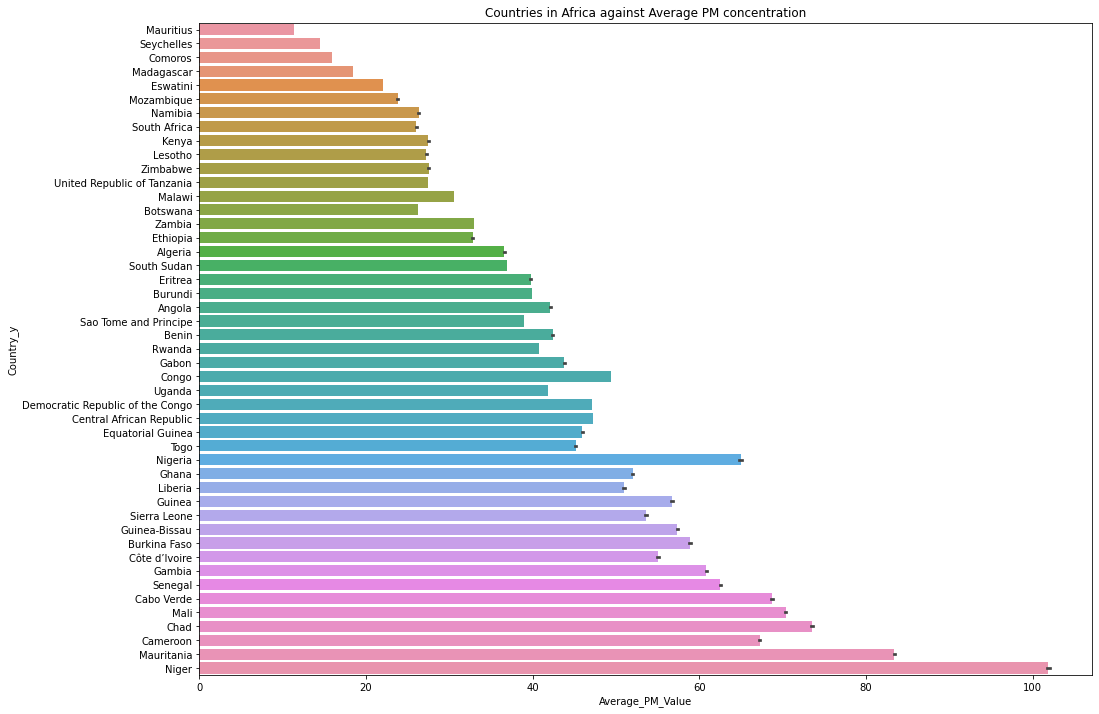

In [328]:
#Assigning a variable  to the merged Mortality-Particulate matter dataset.
Country_PM=merge(D_New_df,D_Our_New_df,'Continent')
Country_PM
#A graph of countries in Africa against the Average PM concentration.
visualization('Average_PM_Value','Country_y',Country_PM,"Countries in Africa against Average PM concentration")

## A graph of Countries in Africa against the CO2 concentration

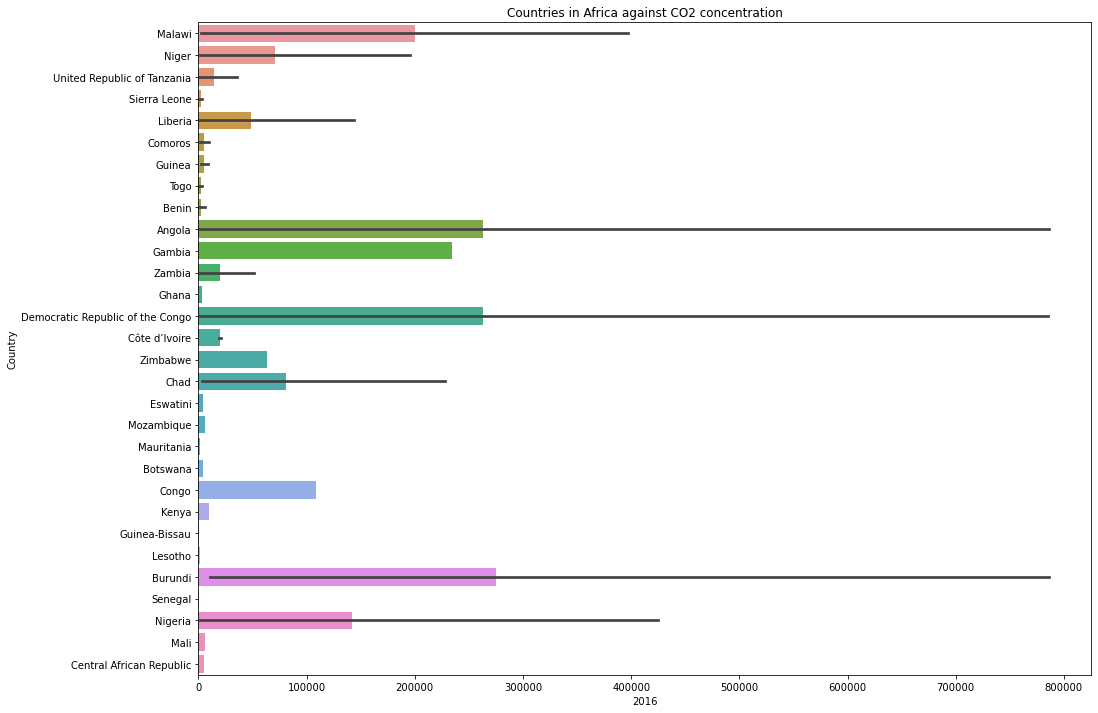

In [325]:
#Asigning the merged Mortality rate C02 concentration dataset.
Country_CO2=merge1(D_New_df,CO2_dropped_2,True,True)
Country_CO2
# Agraph of Countries in Africa against the CO2 concentration.
visualization('2016','Country',Country_CO2,"Countries in Africa against CO2 concentration")

## A graph of countries in Africa against the Nitrogen Oxide Concentration.

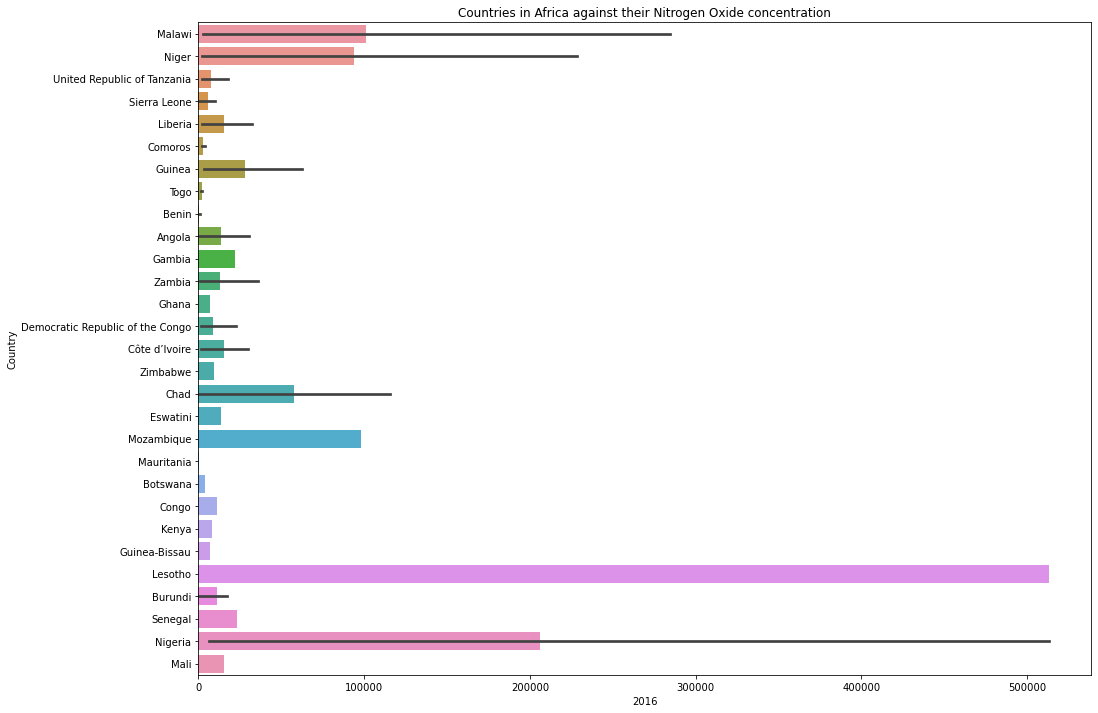

In [330]:
#Assigning a variable to the merged NO-Deathrate dataset.
Country_NO=merge1(D_New_df,NO_dropped_2,True,True)
Country_NO
# A graph of Countries in Africa against the NO concentration.
visualization(2016,'Country',Country_NO,"Countries in Africa against their Nitrogen Oxide concentration")

# A graph of Gender against Mortality rate

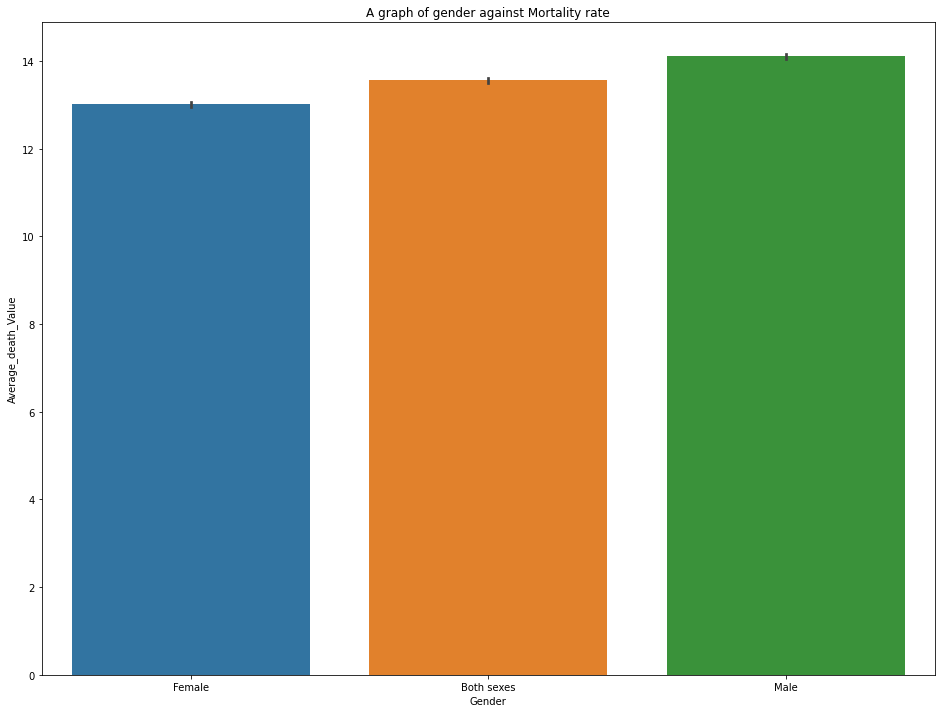

In [333]:
#Picking Gender and Death rate from the Merged PM -deathrate dataset.
visualization('Gender','Average_death_Value',Country_PM,"A graph of gender against Mortality rate")

## A graph of the Cause of death accross Africa with its respective mortality rates.

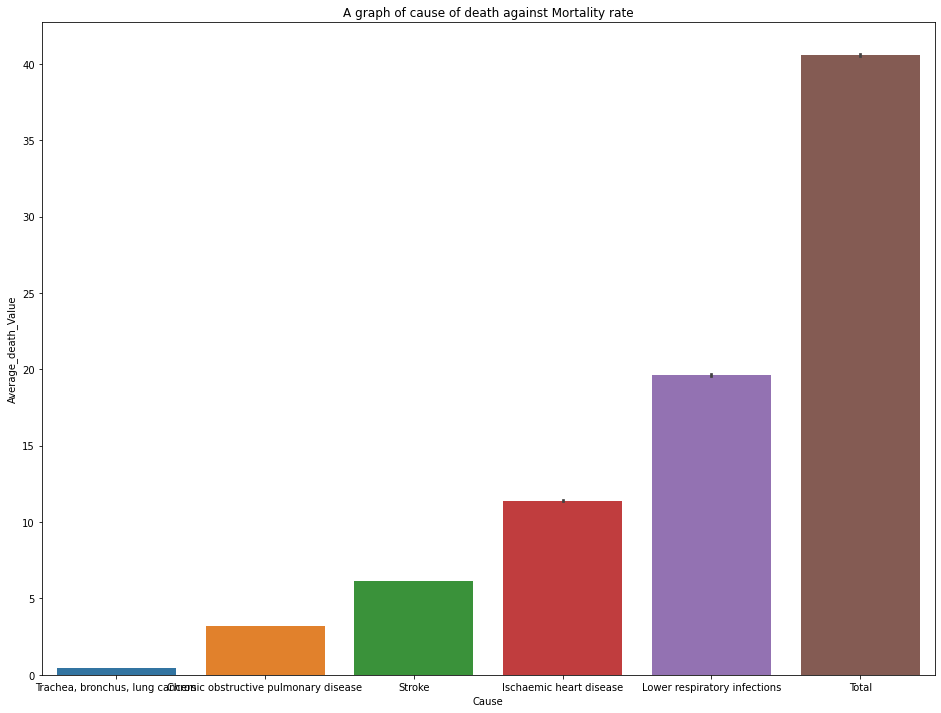

In [334]:
# Picking Cause of death and Death rate from the Merged PM -deathrate dataset.
visualization('Cause','Average_death_Value',Country_PM,"A graph of cause of death against Mortality rate")

# Interactive Visualization